##  Simulated Classifcation
1. State assumptions
2. Formally define classification/regression problem
3. provide algorithm for solving problem (including choosing hyperparameters as appropriate)
4. sample data from a simulation setting inspired by your data (from both null and alternative as defined before)
5. compute accuracy
6. plot accuracy vs. sample size in simulation
7. apply method directly on real data
8. explain the degree to which you believe the result and why
 
### Step 1: State assumptions
$F_{X|0} = ER(p_0) = Bern(p_0)^{V \times V}$ <br/>
$F_{X|1} = ER(p_1) = Bern(p_1)^{V \times V}$

$p_1 \neq p_2$

### Step 2: Formally define classification/regression problem
$G_i, Y_i \sim \mathscr{F}_{G,Y} = \{ F_{G,Y}(\cdot; \theta) : \theta \in \Theta \}$.

Since, all samples observed are graph matched (i.e. nodes are equal across graphs), we can look at just the distribution of adjacency matrices:

$F_{G,Y} = F_{X,Y}$.

Thus,

$X_i = \prod_{u,v}^{\mathcal{E}} A_{uv}$, where $\mathcal{E} \subset V \times V$ <br/>
$Y_i = \{0,1\}$

As we are doing classification, we are trying to minimize expected error. Here, expected error can be defined as:

$E[l] = \sum \Theta(\hat{Y}_i \neq Y_i)$

Where $\Theta$ is the indicator function.

### Step 3: Provide algorithm for solving problem (including choosing hyperparameters as appropriate)
classification:
- lda (linear discriminant analysis): no parameters
- qda (quadratic discriminant analysis): no parameters
- svm (support vector machine): penalty parameters set to 0.5 because it was a default suggested 
- knn (k-nearest neighbours): number of neighbors set to 3 because it was a default suggested
- rf (random forest): like the above, I didn't have better insight so went with defaults. Seemed like a simple starting point, as we always aim for.

regression: linear regression, support vector regression, k-nearest neighbour regression, random forest regression, polynomial regression

### Setup Step

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import igraph as ig

from sklearn import cross_validation
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

np.random.seed(12345678)  # for reproducibility, set random seed
r = 20  # define number of rois
N = 100 # number of samples at each iteration
p0 = 0.10
p1 = 0.15
# define number of subjects per class
S = np.array((8, 16, 20, 32, 40, 64, 80, 100, 120, 200, 320,
              400, 800, 1000))

names = ["Nearest Neighbors", "Linear SVM", "Random Forest",
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

###  Steps 4 & 5:  Sample data from setting similar to data and record classification accuracy

In [2]:
accuracy = np.zeros((len(S), len(classifiers), 2), dtype=np.dtype('float64'))
for idx1, s in enumerate(S):
    s0=s/2
    s1=s/2

    g0 = 1 * (np.random.rand( r, r, s0) > 1-p0)
    g1 = 1 * (np.random.rand( r, r, s1) > 1-p1)
    mbar0 = 1.0*np.sum(g0, axis=(0,1))
    mbar1 = 1.0*np.sum(g1, axis=(0,1))

    X = np.array((np.append(mbar0, mbar1), np.append(mbar0/( r**2), mbar1/( r**2 )))).T
    y = np.append(np.zeros(s0), np.ones(s1))
    
    for idx2, cla in enumerate(classifiers):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
        clf = cla.fit(X_train, y_train)
        loo = LeaveOneOut(len(X))
        scores = cross_validation.cross_val_score(clf, X, y, cv=loo)
        accuracy[idx1, idx2,] = [scores.mean(), scores.std()]
        print("Accuracy of %s: %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))
    
print accuracy

Accuracy of Nearest Neighbors: 1.00 (+/- 0.00)
Accuracy of Linear SVM: 1.00 (+/- 0.00)
Accuracy of Random Forest: 1.00 (+/- 0.00)
Accuracy of Linear Discriminant Analysis: 1.00 (+/- 0.00)
Accuracy of Quadratic Discriminant Analysis: 0.50 (+/- 1.00)
Accuracy of Nearest Neighbors: 0.88 (+/- 0.66)
Accuracy of Linear SVM: 0.94 (+/- 0.48)
Accuracy of Random Forest: 0.94 (+/- 0.48)
Accuracy of Linear Discriminant Analysis: 0.94 (+/- 0.48)
Accuracy of Quadratic Discriminant Analysis: 0.88 (+/- 0.66)
Accuracy of Nearest Neighbors: 1.00 (+/- 0.00)
Accuracy of Linear SVM: 1.00 (+/- 0.00)
Accuracy of Random Forest: 0.95 (+/- 0.44)
Accuracy of Linear Discriminant Analysis: 1.00 (+/- 0.00)
Accuracy of Quadratic Discriminant Analysis: 0.95 (+/- 0.44)
Accuracy of Nearest Neighbors: 0.97 (+/- 0.35)
Accuracy of Linear SVM: 0.97 (+/- 0.35)
Accuracy of Random Forest: 0.97 (+/- 0.35)
Accuracy of Linear Discriminant Analysis: 0.97 (+/- 0.35)
Accuracy of Quadratic Discriminant Analysis: 0.97 (+/- 0.35)
Accu

/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:712: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


### Step 6: Plot Accuracy versus N

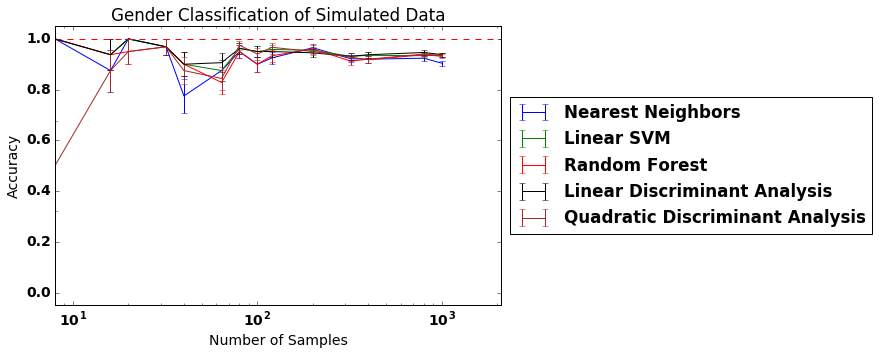

In [18]:
font = {'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

plt.figure(figsize=(8,5))
plt.errorbar(S, accuracy[:,0,0], yerr = accuracy[:,0,1]/np.sqrt(S), hold=True, label=names[0])
plt.errorbar(S, accuracy[:,1,0], yerr = accuracy[:,1,1]/np.sqrt(S), color='green', hold=True, label=names[1])
plt.errorbar(S, accuracy[:,2,0], yerr = accuracy[:,2,1]/np.sqrt(S), color='red', hold=True, label=names[2])
plt.errorbar(S, accuracy[:,3,0], yerr = accuracy[:,3,1]/np.sqrt(S), color='black', hold=True, label=names[3])
plt.errorbar(S, accuracy[:,4,0], yerr = accuracy[:,4,1]/np.sqrt(S), color='brown', hold=True, label=names[4])
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.xlim((0,2100))
plt.ylim((-0.05, 1.05))
plt.ylabel('Accuracy')
plt.title('Gender Classification of Simulated Data')
plt.axhline(1, color='red', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../figs/general_classification.png')
plt.show()

### Step 7: Apply technique to data

In [4]:
# Initializing dataset names
dnames = list(['../data/KKI2009'])
print "Dataset: " + ", ".join(dnames)

# Getting graph names
fs = list()
for dd in dnames:
        fs.extend([root+'/'+file for root, dir, files in os.walk(dd) for file in files])
fs = fs[1:]
def loadGraphs(filenames, rois, printer=False):
    A = np.zeros((rois, rois, len(filenames)))
    for idx, files in enumerate(filenames):
        if printer:
            print "Loading: " + files
        g = ig.Graph.Read_GraphML(files)
        tempg = g.get_adjacency(attribute='weight')
        A[:,:,idx] = np.asarray(tempg.data)
        
    return A

# Load X
X = loadGraphs(fs, 70)
print X.shape

# Load Y
ys = csv.reader(open('../data/kki42_subjectinformation.csv'))
y = [y[5] for y in ys]
y = [1 if x=='F' else 0 for x in y[1:]]

xf = 1.0*np.sum(1.0*(X>0), axis=(0,1))
features = np.array((xf, xf/( 70**2 * 22))).T

Dataset: ../data/KKI2009
(70, 70, 42)


In [5]:
accuracy=np.zeros((len(classifiers),2))
for idx, cla in enumerate(classifiers):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, y, test_size=0.4, random_state=0)
    clf = cla.fit(X_train, y_train)
    loo = LeaveOneOut(len(features))
    scores = cross_validation.cross_val_score(clf, features, y, cv=loo)
    accuracy[idx,] = [scores.mean(), scores.std()]
    print("Accuracy of %s: %0.2f (+/- %0.2f)" % (names[idx], scores.mean(), scores.std() * 2))

Accuracy of Nearest Neighbors: 0.48 (+/- 1.00)
Accuracy of Linear SVM: 0.55 (+/- 1.00)
Accuracy of Random Forest: 0.57 (+/- 0.99)
Accuracy of Linear Discriminant Analysis: 0.45 (+/- 1.00)
Accuracy of Quadratic Discriminant Analysis: 0.71 (+/- 0.90)


### Step 8: Reflect on result

The classification accuracy on real data based on the five tested classifiers is, at best, 71%, and worst, chance. Next, I need to test my assumptions to see if they are accurate and adjust my processing/features to better represent my true scenario than the assumed conditions, if possible.